# Find Bubble Nucleation Sites

In [1]:
%matplotlib inline

In [2]:
import os,sys
from bubble_correlations import *
from experiment import *
from plotting import *

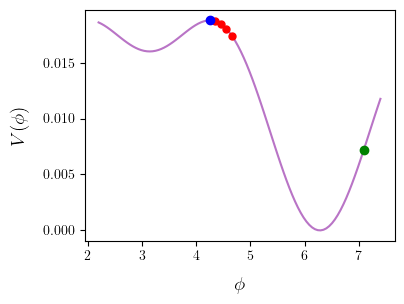

In [4]:
fig, ax = plt.subplots(figsize=(4,3))
philist = np.linspace(1.4*np.pi/2., 7.4, 100)
plt.plot(philist, V(philist, lamb))

plt.plot(list_threshold, V(list_threshold, lamb), 'ro', ms = 5)
plt.plot(right_Vmax.x, V(right_Vmax.x, lamb), 'bo')
plt.plot(collision_thr, V(collision_thr, lamb), 'go')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi)$')
plt.show()

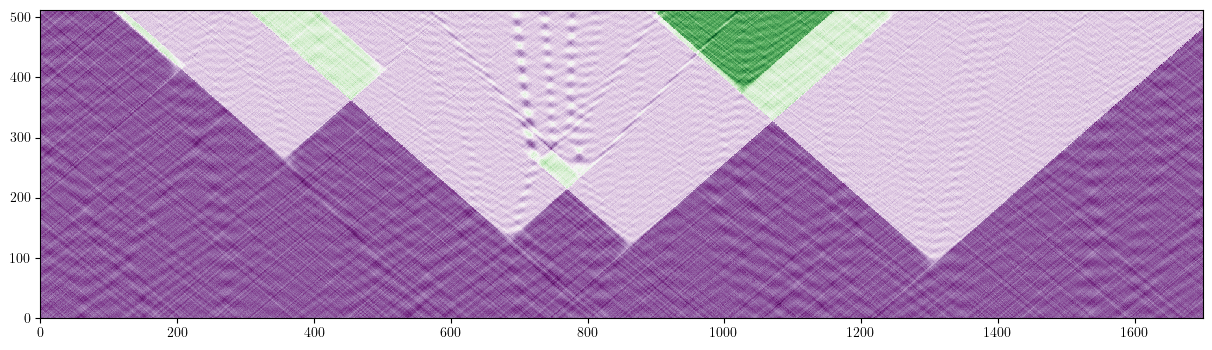

In [5]:
sim = 3

path_sim = sim_location(nLat, lamb, phi0, temp, sim)
real = extract_data(nLat, path_sim)
nC, nT, nN = np.shape(real)
#real = np.roll(real, nN//3, axis=-1)[:,:,:3500]
real = real[:,:,800:2500]
real[0,:,:] = 2.*np.pi - real[0,:,:]
real[1:,:,:]= - real[1:,:,:]
nC, nT, nN  = np.shape(real)
ax= simulation_imshow(real[0], [0,nN,0,nT])
plt.show()


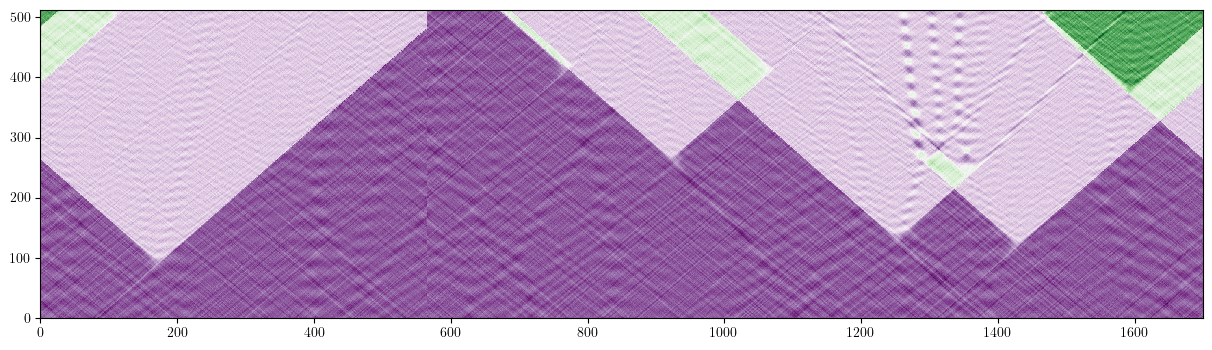

In [6]:
rot = np.roll(real, nN//3, axis=-1)[:,:,:3500]
ax= simulation_imshow(rot[0,:,:3500], [0,nN,0,nT])
plt.show()


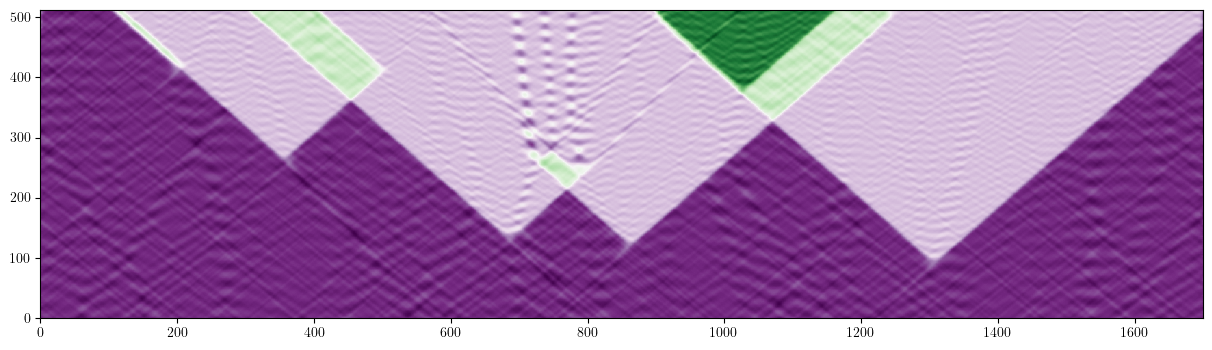

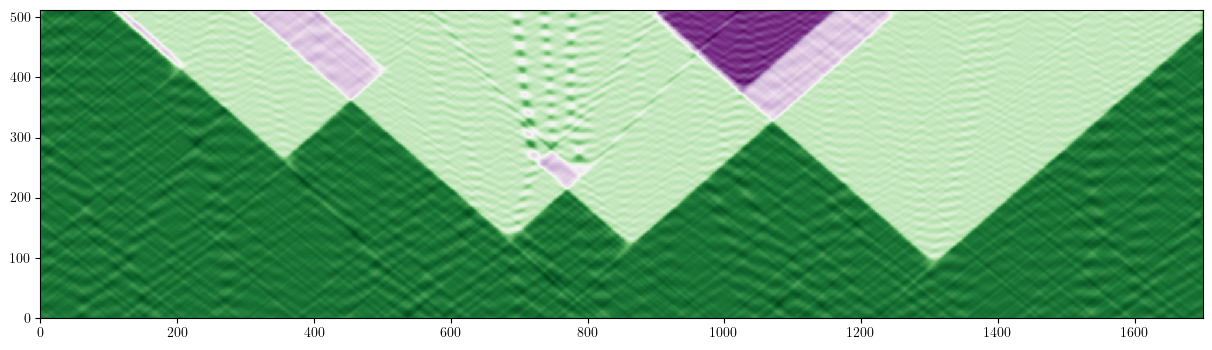

In [7]:
smreal = np.asarray([gaussian_filter1d(real[0,tt], sigma=filter_size, mode='wrap') for tt in range(nT)])
nT, nN = np.shape(smreal)
ax= simulation_imshow(smreal, [0,nN,0,nT])
plt.show()

anti_smreal = 2.*phieq - smreal
ax= simulation_imshow(anti_smreal, [0,nN,0,nT])
plt.show()

dxplot = np.sqrt(m2(lamb))*dx
dtplot = np.sqrt(m2(lamb))*dtout

nT, nN = np.shape(smreal)
ext = [0, dxplot*nN, 0, dtplot*nT]



In [8]:
targets_pos = [identify_bubble_sites(smreal, tMinCutoff, tMaxCutoff, tFutureCheck, lightc, crit_thresh, threshold, collision_thr) for threshold in list_threshold]
targets_neg = [identify_bubble_sites(anti_smreal, tMinCutoff, tMaxCutoff, tFutureCheck, lightc, crit_thresh, threshold, collision_thr) for threshold in list_threshold]


for multiplier =  0.5 there are 4 orangered bubbles at (t, x): [(91, 1305), (121, 861), (131, 686), (263, 358)]


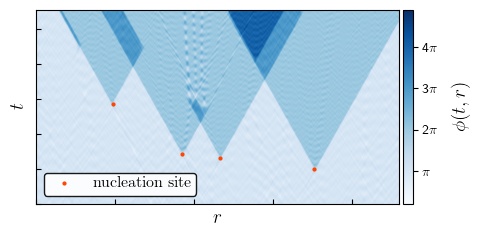

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (5, 2.5))
colors = cycle(('orange', 'lightgreen', 'r', 'indigo'))
marks = cycle(('o', '*', '^', 'v'))

for multiplier, threshold, kkk in zip(list_multiplier, list_threshold, np.arange(len(list_multiplier))):
    if kkk!=2: continue
        
    col = 'orangered'
#    col = next(colors)
#    col = next(colors)
    mss = next(marks)

    targets = targets_pos[kkk]

    print('for multiplier = ', multiplier, 'there are', len(targets), col, 'bubbles at (t, x):', targets)
    for www, targets in enumerate(targets):
       # lab = (r'$\bar{\phi}_t'+' = {:.2f}$'.format(threshold) if www==0 else None)
        lab = (r'$\rm nucleation \; site$' if www==0 else None)
        ax.plot(dxplot*targets[1], dtplot*targets[0], color=col, linestyle="None", marker = mss, ms=2, label=lab)

#    targets = targets_neg[kkk]

#    print('for multiplier = ', multiplier, 'there are', len(targets), col, 'bubbles at (t, x):', targets)
#    for www, targets in enumerate(targets):
#        ax.plot(dxplot*targets[1], dtplot*targets[0], color=col, linestyle="None", marker = mss, ms=3)

    ext = [0, dxplot*nN, 0, dtplot*nT]
    #im = ax.imshow(smreal, aspect='auto', interpolation='none', origin='lower', extent=ext, cmap='RdBu', alpha=1)
    im = ax.imshow(real[0,:], aspect='auto', interpolation='Gaussian', origin='lower', extent=ext, cmap='Blues', alpha=1)

#plt.axhline(tMaxCutoff*dtplot, ls=':', color='darkgray', alpha=0.8)
#plt.axhline(tMinCutoff*dtplot, ls=':', color='darkgray', alpha=0.8)

clb = plt.colorbar(im, ax = ax, pad=0.01)
clb.set_label(r'$\phi(t,r)$')

multp = 1
clb.set_ticks((np.arange(1, 5)*np.pi/multp))
clb.set_ticklabels(['0' if iii == 0 else r'$\pi$' if (iii/multp)==1. else r'$-\pi$' if (iii/multp)==-1. 
                    else str(int(iii/multp))+r'$\pi$' if (iii/multp).is_integer()>0 
                    else str(-int(np.abs(iii)/multp))+r'$\pi$' if (iii/multp).is_integer()<0 
                    else r'$\frac{\pi}{%s}$'%(multp) if iii==1. else r'$-\frac{\pi}{%s}$'%(multp) 
                    if iii==-1. else r'$\frac{%s\pi}{%s}$'%(iii, multp) if iii>1 
                    else r'$-\frac{%s\pi}{%s}$'%(np.abs(iii), multp) for iii in np.arange(1, 5)])
#ax.set(xlabel = r'$\phi_0^{-1} \sqrt{V_0} \; r$', ylabel = r'$\phi_0^{-1} \sqrt{V_0} \; t$')
#ax.set(xlabel = r'$r$', ylabel = r'$t$')
ax.set_xlabel(r'$r$', labelpad=1)
ax.set_ylabel(r'$t$', labelpad=3)

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")
plt.tight_layout()
plt.legend(loc=3, fontsize=11.5, fancybox=True, frameon=True, framealpha=0.9, borderpad=0.25, edgecolor='k')
#plt.savefig('./data/nucleations.pdf', dpi=500)
plt.show()


for multiplier =  0.0 there are 5 orange bubbles at (t, x): [(89, 1304), (120, 860), (130, 686), (263, 358), (410, 200)]
for multiplier =  0.0 there are 0 orange bubbles at (t, x): []
for multiplier =  0.25 there are 4 lightgreen bubbles at (t, x): [(90, 1305), (120, 860), (130, 686), (263, 358)]
for multiplier =  0.25 there are 0 lightgreen bubbles at (t, x): []
for multiplier =  0.5 there are 4 r bubbles at (t, x): [(91, 1305), (121, 861), (131, 686), (263, 358)]
for multiplier =  0.5 there are 0 r bubbles at (t, x): []
for multiplier =  0.75 there are 4 indigo bubbles at (t, x): [(92, 1306), (121, 861), (132, 686), (264, 357)]
for multiplier =  0.75 there are 0 indigo bubbles at (t, x): []
for multiplier =  1.0 there are 4 orange bubbles at (t, x): [(92, 1306), (122, 861), (133, 685), (264, 357)]
for multiplier =  1.0 there are 0 orange bubbles at (t, x): []


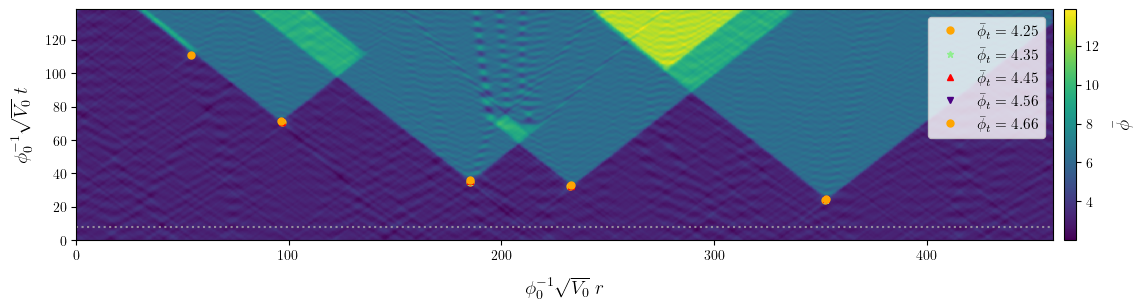

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (15, 3))
colors = cycle(('orange', 'lightgreen', 'r', 'indigo'))
marks = cycle(('o', '*', '^', 'v'))


for multiplier, threshold, kkk in zip(list_multiplier, list_threshold, np.arange(len(list_multiplier))):
    col = next(colors)
    mss = next(marks)

    targets = targets_pos[kkk]

    print('for multiplier = ', multiplier, 'there are', len(targets), col, 'bubbles at (t, x):', targets)
    for www, targets in enumerate(targets):
        lab = (r'$\bar{\phi}_t'+' = {:.2f}$'.format(threshold) if www==0 else None)
        ax.plot(dxplot*targets[1], dtplot*targets[0], color=col, linestyle="None", marker = mss, ms=5, label=lab)

    targets = targets_neg[kkk]

    print('for multiplier = ', multiplier, 'there are', len(targets), col, 'bubbles at (t, x):', targets)
    for www, targets in enumerate(targets):
        ax.plot(dxplot*targets[1], dtplot*targets[0], color=col, linestyle="None", marker = mss, ms=5)

    im = ax.imshow(smreal, aspect='auto', interpolation='none', origin='lower', extent=ext)

plt.axhline(tMaxCutoff*dtplot, ls=':', color='darkgray', alpha=0.8)
plt.axhline(tMinCutoff*dtplot, ls=':', color='darkgray', alpha=0.8)

clb = plt.colorbar(im, ax = ax, pad=0.01)
clb.set_label(r'$\bar{\phi}$')

ax.set(xlabel = r'$\phi_0^{-1} \sqrt{V_0} \; r$', ylabel = r'$\phi_0^{-1} \sqrt{V_0} \; t$')
plt.legend()
plt.show()


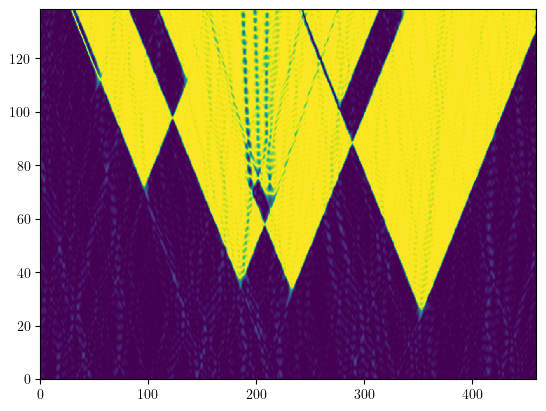

In [11]:
plt.imshow(np.cos(smreal), aspect='auto', interpolation='none', origin='lower', extent=ext)

In [12]:
targetsa = [identify_bubble_sites2(np.cos(smreal), tMinCutoff, tMaxCutoff, tFutureCheck, lightc, \
                                   np.cos(crit_thresh), np.cos(threshold), np.cos(collision_thr)) for threshold in list_threshold]


for multiplier =  0.0 there are 9 orange bubbles at (t, x): [(90, 1305), (120, 860), (132, 686), (246, 782), (264, 357), (267, 732), (378, 1027), (462, 263), (510, 108)]
for multiplier =  0.25 there are 9 lightgreen bubbles at (t, x): [(90, 1305), (120, 860), (132, 686), (249, 779), (264, 357), (267, 732), (378, 1027), (462, 263), (510, 108)]
for multiplier =  0.5 there are 9 r bubbles at (t, x): [(93, 1307), (123, 862), (132, 686), (249, 779), (264, 357), (267, 732), (381, 1027), (462, 263), (510, 108)]
for multiplier =  0.75 there are 11 indigo bubbles at (t, x): [(93, 1307), (123, 862), (132, 686), (249, 797), (252, 778), (264, 357), (270, 734), (288, 746), (381, 1027), (462, 263), (510, 108)]
for multiplier =  1.0 there are 9 orange bubbles at (t, x): [(93, 1307), (123, 862), (135, 685), (252, 778), (264, 357), (270, 734), (381, 1027), (462, 263), (510, 108)]


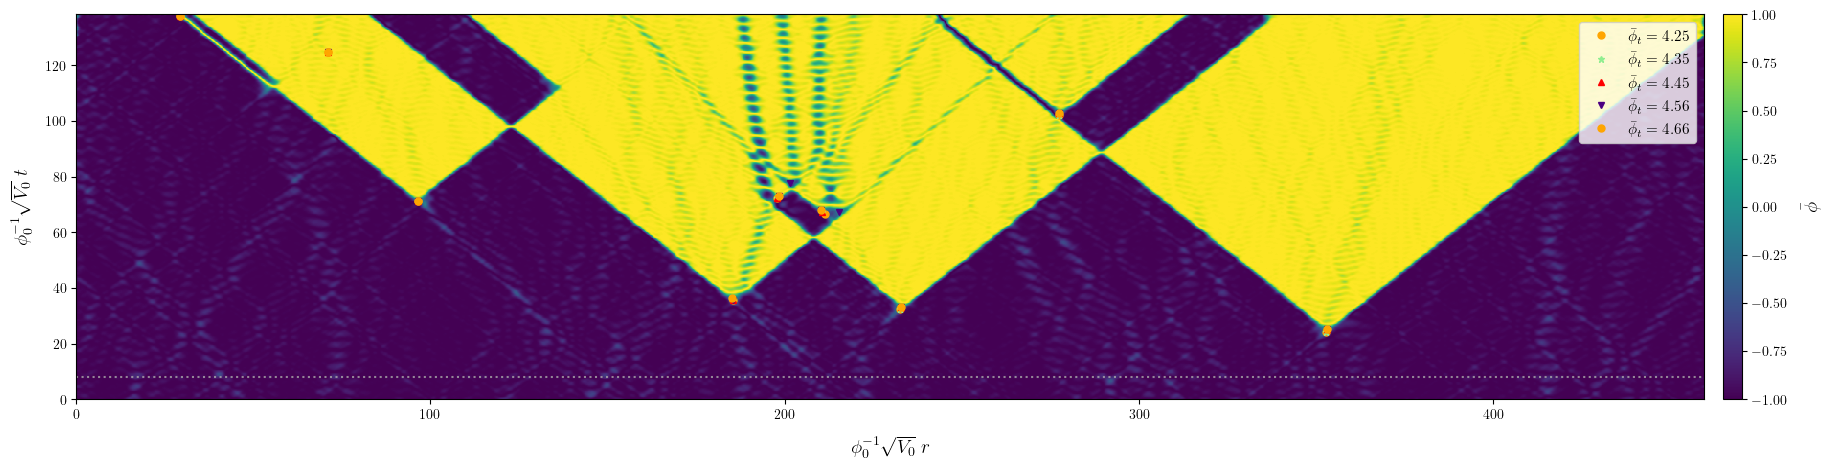

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (25, 5))
colors = cycle(('orange', 'lightgreen', 'r', 'indigo'))
marks = cycle(('o', '*', '^', 'v'))

for kkk, (multiplier, threshold) in enumerate(zip(list_multiplier, list_threshold)):
    col = next(colors)
    mss = next(marks)

    targets = targetsa[kkk]

    print('for multiplier = ', multiplier, 'there are', len(targets), col, 'bubbles at (t, x):', targets)
    for www, targets in enumerate(targets):
        lab = (r'$\bar{\phi}_t'+' = {:.2f}$'.format(threshold) if www==0 else None)
        ax.plot(dxplot*targets[1], dtplot*targets[0], color=col, linestyle="None", marker = mss, ms=5, label=lab)

    ext = [0, dxplot*nN, 0, dtplot*nT]
    im = ax.imshow(np.cos(smreal), aspect='auto', interpolation='none', origin='lower', extent=ext)

plt.axhline(tMaxCutoff*dtplot, ls=':', color='darkgray', alpha=0.8)
plt.axhline(tMinCutoff*dtplot, ls=':', color='darkgray', alpha=0.8)

clb = plt.colorbar(im, ax = ax, pad=0.01)
clb.set_label(r'$\bar{\phi}$')

ax.set(xlabel = r'$\phi_0^{-1} \sqrt{V_0} \; r$', ylabel = r'$\phi_0^{-1} \sqrt{V_0} \; t$')
plt.legend()
plt.show()
